# Вебинар 5. Обучение без учителя.

1. Кластеризация - разделение данных на группы
2. Понижение размерности - из N фичей сделать 2 или 3, и визуализировать

**Подключение библиотек и скриптов**

In [33]:
import numpy as np
import pandas as pd
import pickle

from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d.axes3d import Axes3D

from sklearn.preprocessing import StandardScaler, RobustScaler

# клакстеризация
from sklearn.cluster import KMeans

# Понижения размерности
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse

from lightgbm import LGBMRegressor

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [111]:
matplotlib.rcParams.update({'font.size': 12})

In [94]:
def reduce_dims(df, dims=2, method='pca'):
    
    assert method in ['pca', 'tsne'], 'Неверно указан метод'
    
    if method=='pca':
        dim_reducer = PCA(n_components=dims, random_state=42)
        components = dim_reducer.fit_transform(df)
    elif method == 'tsne':
        dim_reducer = TSNE(n_components=dims, learning_rate=250, random_state=42)
        components = dim_reducer.fit_transform(df)
    else:
        print('Error')
        
    colnames = ['component_' + str(i) for i in range(1, dims+1)]
    return dim_reducer, pd.DataFrame(data = components, columns = colnames) 

In [112]:
def display_components_in_2D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, labels], axis=1)

    if labels is not None:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', 
                                         c=components_with_labels_df.iloc[:, -1], cmap=plt.get_cmap('jet'),
                                         alpha=0.5, figsize=(15,10))
    else:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', alpha=0.5, figsize=(15,10))

    plt.xlabel('component_1')
    plt.ylabel('component_2')
    plt.title('2D mapping of objects')    
    plt.show()

def display_components_in_3D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, labels], axis=1)

    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    
    if labels is not None:
        ax.scatter(components_with_labels_df['component_1'], 
                   components_with_labels_df['component_2'], 
                   components_with_labels_df['component_3'], 
                   c=components_with_labels_df.iloc[:, -1], 
                   cmap=plt.get_cmap('jet'), alpha=0.5)
    else:
        ax.scatter(components_with_labels_df['component_1'], 
                   components_with_labels_df['component_2'], 
                   components_with_labels_df['component_3'], 
                   alpha=0.5)

    ax.set_xlabel('component_1')
    ax.set_ylabel('component_2')
    ax.set_zlabel('component_3')
    plt.title('3D mapping of objects')
    plt.show()

In [ ]:
def apply_elbow_method(X):
    """Визуализация для метода 'локтя'"""
    
    distortions = []
    K = range(2,15)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=33).fit(X)
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

    plt.figure(figsize=(10, 8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

In [ ]:
def display_clusters_distribution(unique_labels, labels_counts):
    """Визуализация распределения классов по кластерам"""
    plt.figure(figsize=(8,5))

    plt.bar(unique, counts)

    plt.xlabel('Clгsters')
    plt.xticks(unique)
    plt.ylabel('Count')
    plt.title('Clusters distribution')
    plt.show()

In [7]:
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3)))
    
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

**Пути к директориям и файлам**

In [113]:
TRAIN_DATASET_PATH = '../data/housing_prepared.csv'
TRAIN_DATASET_EXT_PATH = '../data/housing_train_ext.csv'

### Загрузка данных

**Описание датасета**

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

* **longitude** - долгота
* **latitude** - широта
* **housing_median_age** - средний возраст дома
* **total_rooms** - общее количество комнат
* **total_bedrooms** - общее количество спален
* **population** - количество проживающих
* **households** - домохозяйства
* **ocean_proximity** - близость океана
* **median_income** - средний доход
* **median_house_value** - средняя стоимость дома

In [114]:
df = pd.read_csv(TRAIN_DATASET_PATH)
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  <1H OCEAN  INLAND  NEAR BAY  \
0       322.0       126.0         8.3252          0       0         1   
1      2401.0      1138.0         8.3014          0       0         1   
2       496.0       177.0         7.2574          0       0         1   
3       558.0       219.0         5.6431          0       0         1   
4       565.0       259.0         3.8462          0       0         1   

   NEAR OCEAN  median_house_value  
0           0            452600.0  
1           0            358500.0  
2           0            352100.0  
3           0            341300.0  
4           0            342200.0

In [115]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
<1H OCEAN               int64
INLAND                  int64
NEAR BAY                int64
NEAR OCEAN              int64
median_house_value    float64
dtype: object

### Определение признакового пространства

In [116]:
X = df.drop('median_house_value', axis=1)
y = df[['median_house_value']]

X.head(2)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   

   population  households  median_income  <1H OCEAN  INLAND  NEAR BAY  \
0       322.0       126.0         8.3252          0       0         1   
1      2401.0      1138.0         8.3014          0       0         1   

   NEAR OCEAN  
0           0  
1           0

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

## Масштабирование / Нормализация !!!

In [56]:
# Для каждой фичи х делает: (x - mean) / std
# scaler = StandardScaler()

# Для каждой фичи х делает: (x - median) / (q75 - q25)
## (q75 - q25) похоже на std
## median на mean
## НО median, q75, q25 устойчивы к выбросам
scaler = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0))

colnames = X.columns
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=colnames)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=colnames) # НЕ обучаемся на тесте!

X_train_scaled.head(2)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.198413  0.245383           -1.388889    -1.254978       -1.251445   
1   0.230159 -0.068602           -0.722222     0.551857        0.257225   

   population  households  median_income  <1H OCEAN  INLAND  NEAR BAY  \
0   -1.265284   -1.264615      -0.516324        0.0     1.0       0.0   
1    0.383188    0.190769       0.715002        0.0     1.0       0.0   

   NEAR OCEAN  
0         0.0  
1         0.0

В _scaled все признаки измеряются в одних единицах

In [118]:
X_train_scaled.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  13182.000000  13182.000000        13182.000000  13182.000000   
mean      -0.275141      0.367640           -0.031280      0.299628   
std        0.530962      0.568250            0.684297      1.286582   
min       -1.537037     -0.459103           -1.555556     -1.254978   
25%       -0.857143     -0.089710           -0.611111     -0.400743   
50%        0.000000      0.000000            0.000000      0.000000   
75%        0.142857      0.910290            0.388889      0.599257   
max        1.119048      2.023747            1.277778     21.291828   

       total_bedrooms    population    households  median_income  \
count    13182.000000  13182.000000  13182.000000   13182.000000   
mean         0.300403      0.295044      0.271802       0.113549   
std          1.206267      1.199331      1.168905       0.764799   
min         -1.251445     -1.266376     -1.264615      -1.434141   
25%         -0.395954     -0.386463     -0.406154      -0.445595   
50%          0.000000      0.000000      0.000000       0.000000   
75%          0.604046      0.613537      0.593846       0.554405   
max         14.554913     16.328603     14.695385       5.663363   

          <1H OCEAN        INLAND      NEAR BAY    NEAR OCEAN  
count  13182.000000  13182.000000  13182.000000  13182.000000  
mean       0.433697      0.333106      0.108481      0.123274  
std        0.495603      0.471342      0.310999      0.328764  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000  
75%        1.000000      1.000000      0.000000      0.000000  
max        1.000000      1.000000      1.000000      1.000000

Когда **необходимо** применять масштабирование/нормализацию:
- Во всех методах понижения размерности
- В линейной регрессии

Когда **не обязательно** использовать масштабирование/нормализацию:
- Дерево решений
- Случайный лес
- Градентный бустинг

### Понижение размерности: PCA -  Principal Component Analysis (метод главных компонент)

**Из 2-мерного пространства в 1-мерное**

фичи X1, X2

$$component_1 = a_1*X_1 + a_2*X_2$$

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


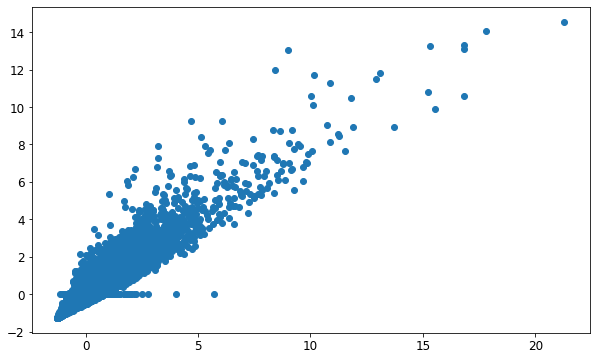

In [122]:
X_small = X_train_scaled[['total_rooms', 'total_bedrooms']]

pca = PCA(n_components=1, random_state=42)
X_small['component_1'] = pca.fit_transform(X_small)

plt.figure(figsize=(10,6))
plt.scatter(X_small.total_rooms,  X_small.total_bedrooms)
plt.show()

PCA подбирает такую линию, вдоль которой ледат точкп

В линейной регресии вы минимизируете "вертикальную разницу":
    $$\sum(y - y_{hat})^2$$
    
В PCA вы минмизируете среднее расстояние от точек до линии - перпендикуляр к линиии:
$$\sum (x1_{i} - x1'_{i})^2 + (x2_{i} - x2'_{i})^2$$

**Как работает PCA из 3d в 2d**

<img src="pca_1.png">

**Снижение размерности до 2х компонент**

In [124]:
dim_reducer2d, components_2d = reduce_dims(X_train_scaled, dims=2, method='pca')
components_2d.head(2)

component_1  component_2
0    -2.951421    -0.121055
1     0.223307     0.502295

In [125]:
X_train_scaled.shape, components_2d.shape

((13182, 12), (13182, 2))

In [126]:
dim_reducer2d

PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [127]:
display_components_in_2D_space(components_2d, y_train)

**Снижение размерности до 3х компонент**

In [128]:
dim_reducer3d, components_3d = reduce_dims(X_train_scaled, dims=3, method='pca')

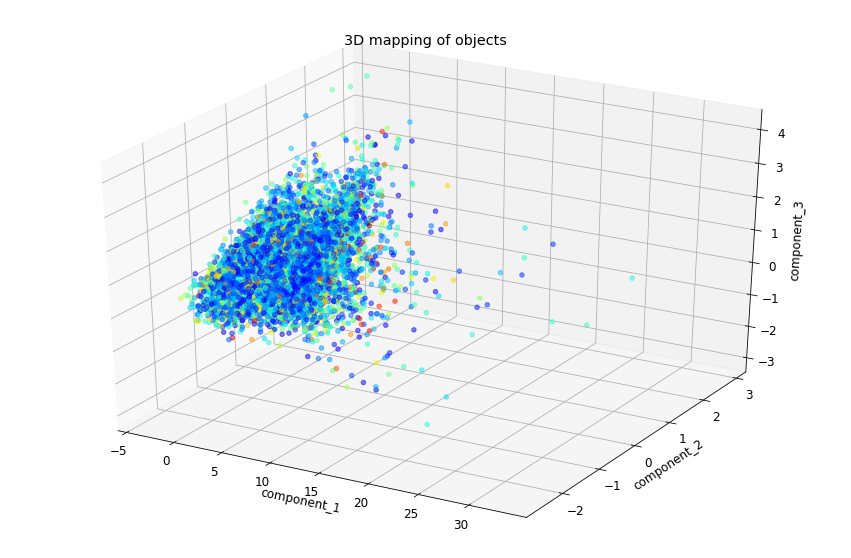

In [129]:
display_components_in_3D_space(components_3d, y_train)

## TSNE

Объяснение можно посмотреть [здесь](https://mlexplained.com/2018/09/14/paper-dissected-visualizing-data-using-t-sne-explained/)

# Кластеризация

Алгоритмы:
- K-means: объяснен в вебинаре (ниже)
- [Иерархическая кластеризация](https://towardsdatascience.com/https-towardsdatascience-com-hierarchical-clustering-6f3c98c9d0ca)
- [HDBScan](https://towardsdatascience.com/lightning-talk-clustering-with-hdbscan-d47b83d1b03a)

### Кластеризация: k-means

**Как работает k-means**

Вы указываете кол-во кластеров

1. Центры кластеров случайно инициализируются
2. От каждой точки рассчитывается расстояние до центра каждого кластера
3. Присваиваем каждую точку к тому кластру, к центру которого она ближе
4. Пересчитываем центры кластеров: берем среднее по всем фичам --> новый центр кластера
    
итеративно повторяем шаги 2-4. Пока центры кластеров не перестанут "двигаться"

Хорошо работает, когда кластеры "шарообразные"

<img src="kmeans_v1.gif">

<img src="kmeans_v2.gif">

**Выделение 3 кластеров**

In [132]:
kmeans_3 = KMeans(n_clusters=3, random_state=42)
labels_clast_3 = kmeans_3.fit_predict(X_train_scaled)
labels_clast_3 = pd.Series(labels_clast_3, name='clusters_3')

unique, counts = np.unique(labels_clast_3, return_counts=True)
display_clusters_distribution(unique, counts)

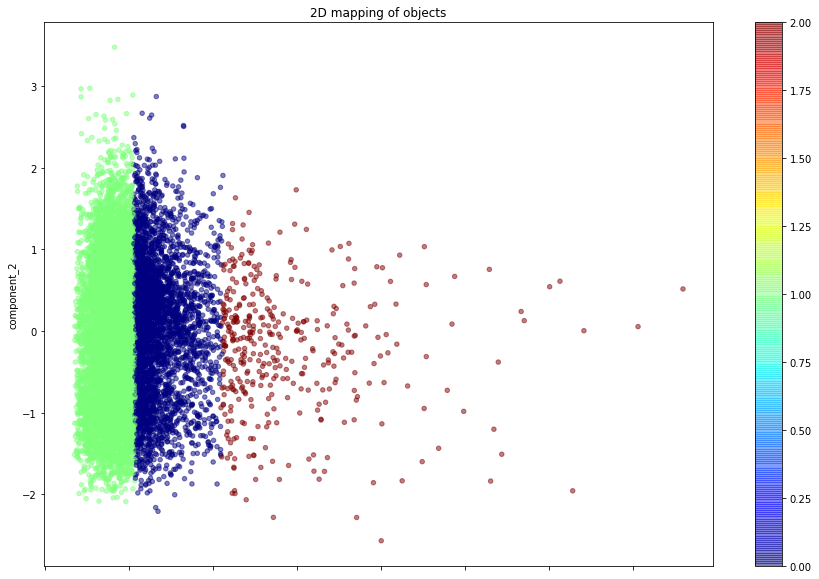

In [108]:
display_components_in_2D_space(components_2d, labels_clast_3)

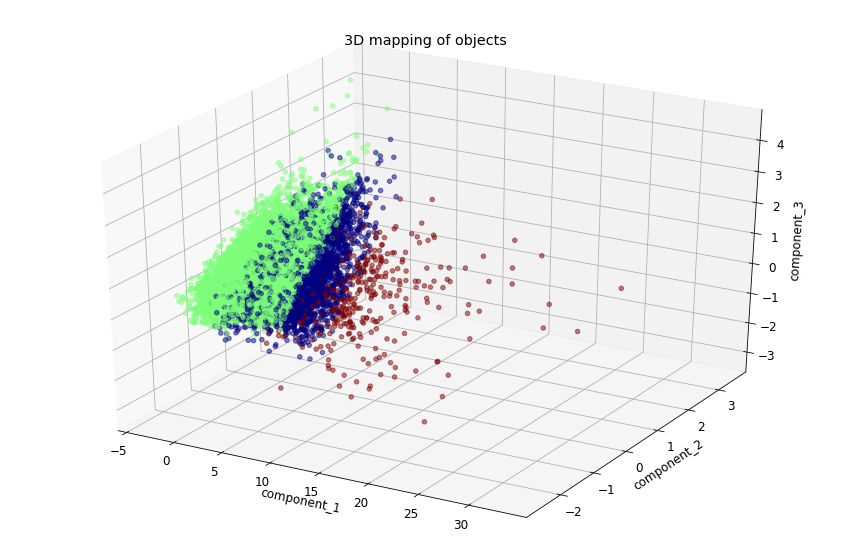

In [133]:
display_components_in_3D_space(components_3d, labels_clast_3)

**Выделение 10 кластеров**

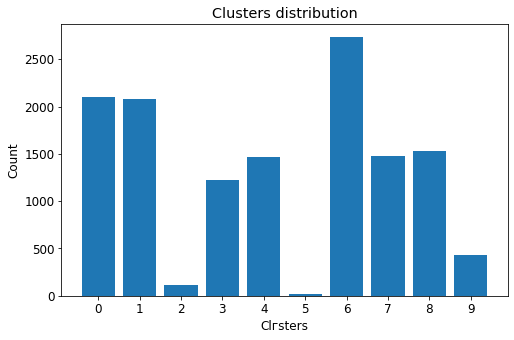

In [134]:
kmeans_10 = KMeans(n_clusters=10, random_state=42)
labels_clast_10 = kmeans_10.fit_predict(X_train_scaled)
labels_clast_10 = pd.Series(labels_clast_10, name='clusters_10')

unique, counts = np.unique(labels_clast_10, return_counts=True)
display_clusters_distribution(unique, counts)

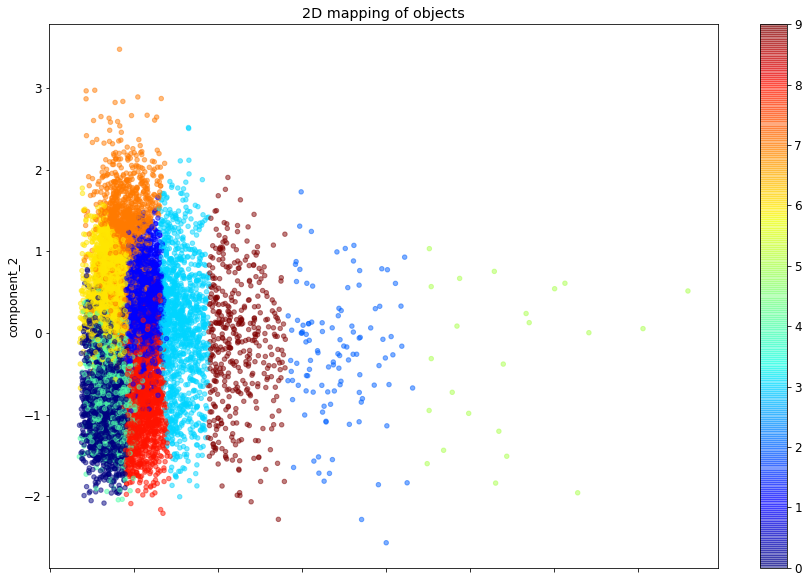

In [135]:
display_components_in_2D_space(components_2d, labels_clast_10)

In [136]:
display_components_in_3D_space(components_3d, labels_clast_10)

### Оценка оптимального кол-ва кластеров

Дисперсия точек вокруг цетров кластеров

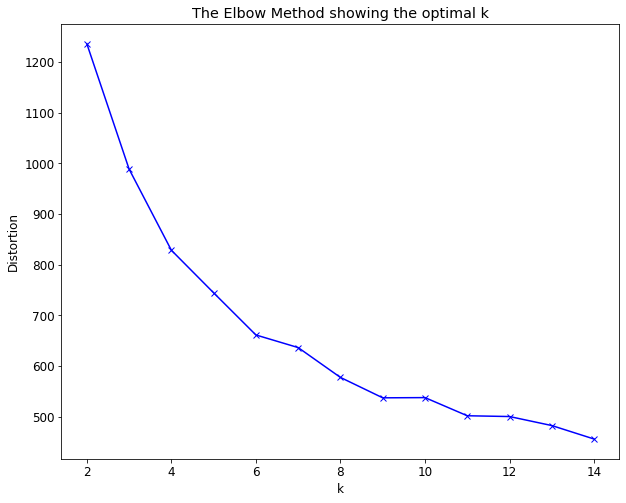

In [137]:
apply_elbow_method(df_features)

### Добавление новых признаков

In [23]:
clusters_3_dummies = pd.get_dummies(labels_clast_3, drop_first=True, prefix='clusters_3')
clusters_10_dummies = pd.get_dummies(labels_clast_10, drop_first=True, prefix='clusters_10')

X_train_scaled = pd.concat([X_train_scaled, components_3d, clusters_3_dummies, clusters_10_dummies, df['median_house_value']], 
                   axis=1)

X_train_scaled.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  <1H OCEAN  INLAND  ...  \
0       322.0       126.0         8.3252          0       0  ...   
1      2401.0      1138.0         8.3014          0       0  ...   
2       496.0       177.0         7.2574          0       0  ...   
3       558.0       219.0         5.6431          0       0  ...   
4       565.0       259.0         3.8462          0       0  ...   

   clusters_10_1  clusters_10_2  clusters_10_3  clusters_10_4  clusters_10_5  \
0              0              0              1              0              0   
1              0              1              0              0              0   
2              0              0              1              0              0   
3              0              0              1              0              0   
4              0              0              0              0              0   

   clusters_10_6  clusters_10_7  clusters_10_8  clusters_10_9  \
0              0              0              0              0   
1              0              0              0              0   
2              0              0              0              0   
3              0              0              0              0   
4              1              0              0              0   

   median_house_value  
0            452600.0  
1            358500.0  
2            352100.0  
3            341300.0  
4            342200.0  

[5 rows x 27 columns]

### Сохранение расширенного обучающего датасета

In [24]:
df_ext.to_csv(TRAIN_DATASET_EXT_PATH, index=False, encoding='utf-8')

### Переобучение и оценка финальной модели

In [28]:
final_model = LGBMRegressor(criterion='mse',
                            max_depth=10,
                            min_samples_leaf=10,
                            random_state=42,  

                            n_estimators=400)
final_model.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              criterion='mse', importance_type='split', learning_rate=0.1,
              max_depth=10, min_child_samples=20, min_child_weight=0.001,
              min_samples_leaf=10, min_split_gain=0.0, n_estimators=400,
              n_jobs=-1, num_leaves=31, objective=None, random_state=42,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [29]:
y_train_preds = final_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.936
MAE:	17478.44
MSE:	613623906.501


R2:	0.824
MAE:	27873.349
MSE:	1692293486.922


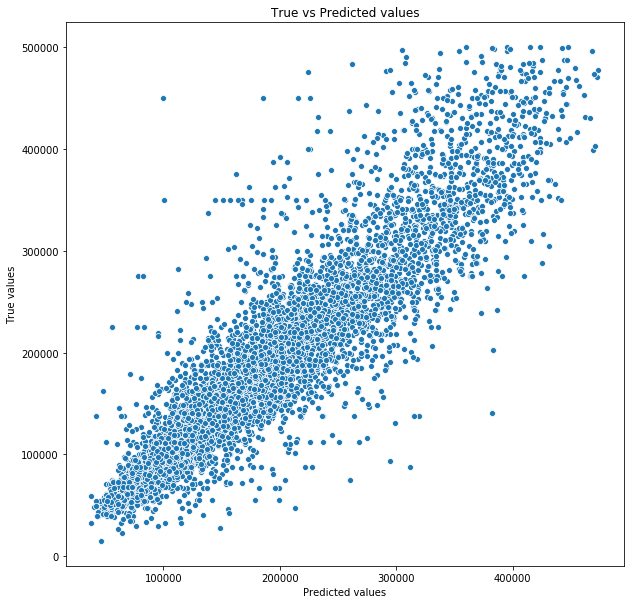

In [30]:
y_test_preds = final_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

*Без фичей с кластерами было 0.814 - см вебинар 4*

In [31]:
feature_importances = pd.DataFrame(zip(X_train.columns, final_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

feature_name  importance
1             latitude        1839
0            longitude        1784
7        median_income        1389
14         component_3        1277
13         component_2        1240
2   housing_median_age         957
5           population         780
6           households         673
3          total_rooms         563
4       total_bedrooms         552
12         component_1         480
9               INLAND         142
8            <1H OCEAN         130
11          NEAR OCEAN          57
10            NEAR BAY          34
25       clusters_10_9          24
22       clusters_10_6          15
18       clusters_10_2          14
21       clusters_10_5          12
17       clusters_10_1           6
16        clusters_3_2           2
19       clusters_10_3           0
20       clusters_10_4           0
23       clusters_10_7           0
24       clusters_10_8           0
15        clusters_3_1           0